<a href="https://colab.research.google.com/github/IamShivamJaiswal/100-Days-Of-ML-Code/blob/master/Recombee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing dependencies

In [0]:
!pip install recombee-api-client

     |████████████████████████████████| 122kB 6.7MB/s 


## Importing libraries

In [0]:
from recombee_api_client.api_client import RecombeeClient
from recombee_api_client.exceptions import APIException
from recombee_api_client.api_requests import  AddDetailView,AddPurchase,AddBookmark,AddRating,AddCartAddition,SetViewPortion
from recombee_api_client.api_requests import  AddDetailView , AddUserProperty , AddUser ,SetUserValues ,DeleteDetailView
from recombee_api_client.api_requests import AddPurchase, RecommendItemsToUser,RecommendItemsToItem, Batch ,ResetDatabase ,AddItemProperty, SetItemValues 
import random
import pandas as pd

## Downloading the data

In [0]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#https://drive.google.com/open?id=1qYUBlao91MeOyhkJIaYser-wTyTUqEn7
#https://docs.google.com/spreadsheets/d/1EBs2JArjgDaS6KSYaNtqRlT-x7FoX3I2mVYVyZ5MlPo/edit?usp=sharing
#https://drive.google.com/file/d/1UId1w1biUsv9MFuUIzVz3jijHcvA8JFb/view?usp=sharing
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1UId1w1biUsv9MFuUIzVz3jijHcvA8JFb'
file_id ="11JmGcDtyTSqFfJu_VcLjNJquKPqrqErs"
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("Metadata.csv")

# !wget http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
# !unzip ml-latest-small.zip

## Creating RecombeeClient

In [0]:
client = RecombeeClient('sgservices-train', 'ZzUvRGwQtlAoSJJy8Yf4l2x2dFWgx7YejKxeops6nITy6ErI54BHdfq0CCPTkUMt')

## Clearing the database

In [0]:
#Clear the entire database
client.send(ResetDatabase())

'ok'

In [0]:
requests = []

## Setting the field for the given item

In [0]:
client.send(AddItemProperty('city', 'string'))
client.send(AddItemProperty('state', 'string'))
client.send(AddItemProperty('country', 'string'))
client.send(AddItemProperty('IsActive', 'string'))
client.send(AddItemProperty('tags', 'string'))
client.send(AddItemProperty('ngo', 'string'))
client.send(AddItemProperty('campaignType','string'))

'ok'

## Reading the data from file

In [0]:
import pandas as pd
#df = pd.read_csv("ml-latest-small/ratings.csv",delimiter=",")
df = pd.read_csv("Metadata.csv",delimiter=",")

In [0]:
df = df.dropna()

In [0]:
df.head()

,campaignid,city,state,country,tags,IsActive,ngo,campaignType
0,5ca051a6c29d45477d90ca7e,Bengaluru,Karnataka,India,Education,PUBLISHED,5ca05019c29d45477d90ca76,volunteerCampaign
1,5ca091f60423b9fb4b03f199,Bengaluru,Karnataka,India,Health,UNPUBLISHED,5ca04f806ad395ad77629a07,volunteerCampaign
2,5cb454ebbdfb7e70901607d5,Hyderabad,Telangana,India,Health,PUBLISHED,5ca05019c29d45477d90ca76,volunteerCampaign
3,5ca094a6c29d45477d90cb09,Bengaluru,Karnataka,India,Education,PUBLISHED,5ca05019c29d45477d90ca76,event
4,5ca0a7530aaf3f61807e1062,Bengaluru,Karnataka,India,Health,PUBLISHED,5ca05019c29d45477d90ca76,membershipCampaign


In [0]:
df.shape

(97, 8)

In [0]:
requests = []
for _,row in df.iterrows():
    # Prepare requests for setting a catalog of computers
    r = SetItemValues(
        row["campaignid"], #itemId
        #values:
        {
            'city':     row["city"],
            'state':    row["state"],
            'country':  row['country'],
            'tags':     row['tags'],
            'IsActive': row['IsActive'],
            'ngo':      row["ngo"],
            'campaignType': row["campaignType"]
        },
        cascade_create=True   # Use cascadeCreate for creating item
                              # with given itemId if it doesn't exist
      )
    requests.append(r)

In [0]:
# Send catalog to the recommender system
client.send(Batch(requests))

[{'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 

## Adding fields for user

In [0]:
client.send(AddUserProperty("age", "double"))
client.send(AddUserProperty("gender", "string"))
client.send(AddUserProperty("location", "string"))
client.send(AddUserProperty("income", "double"))
client.send(AddUserProperty("education", "string"))
client.send(AddUserProperty("interest", "set"))  ### ==> General, Health, Education

'ok'

In [0]:
%%writefile user.csv
sazenId,age,gender,location,income,education,interest
5c529aae917aac0011f3a1cf,30,M,Bengaluru,45684,SSC,"['Education','General']"
5c4eca02045bbda55590dd84,30,M,Kevadia,45684,SSC,"['General','Health']"
5afaad90abacd6001b774ab5,30,M,Benaluru,45684,SSC,"['General','Education','Health']"

Writing user.csv


In [0]:
dfi = pd.read_csv("user.csv")
# Prepare some purchases of items by users
requests = []

for _,row in dfi.iterrows():
      requests.append(AddUser(row["sazenId"]))
      #requests.append(AddDetailView(row["sazenId"],row["campaignid"],cascade_create=True))

In [0]:
client.send(Batch(requests))

[{'code': 201, 'json': 'ok'},
 {'code': 201, 'json': 'ok'},
 {'code': 201, 'json': 'ok'}]

In [0]:
dfi = pd.read_csv("user.csv")
#dfi = pd.read_csv("ngo_based_change.csv")
# Prepare some purchases of items by users
requests = []
import ast
for _,row in dfi.iterrows():
      requests.append(SetUserValues(
          row["sazenId"],
          {
              "age" : row["age"],
              "gender": row["gender"],
              "income": row["income"],
              "location" : row["location"],
              "education" : row["education"],
              "interest"  : ast.literal_eval(row["interest"])
          },cascade_create=True
          ))
      #requests.append(AddDetailView(row["sazenId"],row["campaignid"],cascade_create=True))

In [0]:
client.send(Batch(requests))

[{'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'}]

In [0]:
%%writefile ngo_based.csv
sazenId,campaignid,random
5c4eca02045bbda55590dd84,5ca4cbdb5305a3cf88c6258e,3
5c4eca02045bbda55590dd84,5ca5c917762308767b8bcd3a,3
5c4eca02045bbda55590dd84,5ca5ce2f762308767b8bcd51,3
5c4eca02045bbda55590dd84,5ca5cf33762308767b8bcd8c,3
5c4eca02045bbda55590dd84,5cb094916274475fdd8899af,3
5c4eca02045bbda55590dd84,5cb96dfc6d6e2af7fba0b12c,4
5c4eca02045bbda55590dd84,5cb9b7e5da48d22671b53daa,4
5c4eca02045bbda55590dd84,5cb9bb6a76f302286b1f2dea,4
5c4eca02045bbda55590dd84,5cb9beea44982728ca33c57a,2
5c4eca02045bbda55590dd84,5cbd3c76a750b609ec903906,2
5c4eca02045bbda55590dd84,5ca091f60423b9fb4b03f199,3
5c4eca02045bbda55590dd84,5cb454ebbdfb7e70901607d5,3
5c4eca02045bbda55590dd84,5ca0a7530aaf3f61807e1062,3
5c4eca02045bbda55590dd84,5ca1ad420738b94bec5b0b91,3
5c4eca02045bbda55590dd84,5ca5ced4762308767b8bcd71,3
5c4eca02045bbda55590dd84,5ca60afa48e2d4a60fe7076c,3
5c4eca02045bbda55590dd84,5ca6e12220b120a140e619ea,3
5c4eca02045bbda55590dd84,5ca7012723e4611328f80bda,3
5c4eca02045bbda55590dd84,5caf3255c864f7182ceaabc3,3
5c4eca02045bbda55590dd84,5cb4553bbdfb7e70901607e7,3
5c4eca02045bbda55590dd84,5cb597d3497d72232033185d,4
5c4eca02045bbda55590dd84,5cb9bc501fd7c12886a5d760,4
5c4eca02045bbda55590dd84,5cb9bd7944982728ca33c55f,4
5c4eca02045bbda55590dd84,5cbd42371c036f0cc1b04076,4
5c4eca02045bbda55590dd84,5cbd42b61c036f0cc1b0408e,2
5c4eca02045bbda55590dd84,5cbd44152922b10d80d780cc,2
5c4eca02045bbda55590dd84,5cbd60dc541fec184604613d,2
5c4eca02045bbda55590dd84,5cc32109f3b060ce121bc09f,2
5c4eca02045bbda55590dd84,5cc330f137baefe473580506,2
5c4eca02045bbda55590dd84,5cc3312337baefe473580517,2
5c4eca02045bbda55590dd84,5cc3316737baefe473580536,2
5c4eca02045bbda55590dd84,5d00a7177afa8502eb0734c3,2
5c4eca02045bbda55590dd84,5d00f16ff6a60c0014c6e1eb,2
5c4eca02045bbda55590dd84,5d077e120ba1023371220d51,2
5c4eca02045bbda55590dd84,5d24815aabce3162e392b459,2
5c4eca02045bbda55590dd84,5d25b2b6e6db3c2ba0ac57a2,2
5c4eca02045bbda55590dd84,5ca051a6c29d45477d90ca7e,3
5c4eca02045bbda55590dd84,5ca094a6c29d45477d90cb09,3
5c4eca02045bbda55590dd84,5ca214dc25e6ad51d90896b3,4
5c4eca02045bbda55590dd84,5ca367c0b7243767cac4ff8f,4
5c4eca02045bbda55590dd84,5ca4a758c554d63d4e18416f,4
5c4eca02045bbda55590dd84,5ca05944585385cb612c1bb3,4
5c4eca02045bbda55590dd84,5cb59759497d722320331848,4
5c4eca02045bbda55590dd84,5cb96ee07e64474d07441a99,2
5c4eca02045bbda55590dd84,5cb96fd17e64474d07441ab5,2
5c4eca02045bbda55590dd84,5cbd5fb3100a6617e1d72c7d,2
5c4eca02045bbda55590dd84,5cc321c1f3b060ce121bc0b0,2
5c4eca02045bbda55590dd84,5cc330c937baefe4735804fa,2
5c4eca02045bbda55590dd84,5cfdebd081b899d31e62496c,2
5c529aae917aac0011f3a1cf,5d0881ee830acc143d7b1058,2
5c529aae917aac0011f3a1cf,5d135adb9f3c071e9eb447d1,3
5c529aae917aac0011f3a1cf,5d2318ea1ffbf631b12451fd,4
5c529aae917aac0011f3a1cf,5d25b804d04b442cac24d0ef,1
5c529aae917aac0011f3a1cf,5d25cceb2ea5a530c229a577,2
5c529aae917aac0011f3a1cf,5d25cd0f2ea5a530c229a587,3
5c529aae917aac0011f3a1cf,5d25cdb12ea5a530c229a5b6,4
5c529aae917aac0011f3a1cf,5d2c6352e8e853dbb762d6d5,0
5c529aae917aac0011f3a1cf,5d2d9fe8d3758d11e63cf636,1
5c529aae917aac0011f3a1cf,5d316a890535df31c9f83ba2,2
5c529aae917aac0011f3a1cf,5d393bf6e0b84c8680c853ef,3
5c529aae917aac0011f3a1cf,5d39587aad763e2367b4bf5a,4
5c529aae917aac0011f3a1cf,5d396a785381d4252b078f6d,1
5c529aae917aac0011f3a1cf,5d4bc754732c6f18a6ebce85,2
5c529aae917aac0011f3a1cf,5d4bd06fe9ee9819383d1592,3
5afaad90abacd6001b774ab5,5cbd6053541fec184604611a,1
5afaad90abacd6001b774ab5,5cbd607d541fec1846046129,2
5afaad90abacd6001b774ab5,5cc163c9fcf7ac12b6e1596c,3
5afaad90abacd6001b774ab5,5cc321eff3b060ce121bc0bd,4
5afaad90abacd6001b774ab5,5ce235b612e2e80913a4aa80,1
5afaad90abacd6001b774ab5,5cfe2f41c3a29041e17ad00d,2
5afaad90abacd6001b774ab5,5cfe3027c3a29041e17ad01c,3
5afaad90abacd6001b774ab5,5d0b5029e722871eb977df00,4

Writing ngo_based.csv


In [0]:
# %%writefile ngo_based.csv
# sazenId,campaignid
# 5afaad90abacd6001b774ab5,5ca5ce2f762308767b8bcd51
# 5afaad90abacd6001b774ab5,5ca214dc25e6ad51d90896b3
# 5afaad90abacd6001b774ab5,5ca5cf33762308767b8bcd8c
# 5afaad90abacd6001b774ab5,5ca60afa48e2d4a60fe7076c
# 5afaad90abacd6001b774ab5,5cb597d3497d72232033185d
# 5afaad90abacd6001b774ab5,5cbd42b61c036f0cc1b0408e
# 5afaad90abacd6001b774ab5,5cbd6053541fec184604611a
# 5afaad90abacd6001b774ab5,5cbd607d541fec1846046129
# 5afaad90abacd6001b774ab5,5cc321eff3b060ce121bc0bd
# 5afaad90abacd6001b774ab5,5cc330c937baefe4735804fa
# 5c4eca02045bbda55590dd84,5cb094916274475fdd8899af
# 5c4eca02045bbda55590dd84,5ca5ced4762308767b8bcd71
# 5c4eca02045bbda55590dd84,5ca1ad420738b94bec5b0b91
# 5c4eca02045bbda55590dd84,5ca367c0b7243767cac4ff8f
# 5c4eca02045bbda55590dd84,5caf3255c864f7182ceaabc3
# 5c4eca02045bbda55590dd84,5cb9beea44982728ca33c57a
# 5c4eca02045bbda55590dd84,5cbd42371c036f0cc1b04076
# 5c4eca02045bbda55590dd84,5cbd5fb3100a6617e1d72c7d
# 5c4eca02045bbda55590dd84,5cc32109f3b060ce121bc09f
# 5c4eca02045bbda55590dd84,5cc3312337baefe473580517
# 5c4eca02045bbda55590dd84,5ce235b612e2e80913a4aa80
# 5c4eca02045bbda55590dd84,5d0881ee830acc143d7b1058
# 5c4eca02045bbda55590dd84,5d135adb9f3c071e9eb447d1
# 5c4eca02045bbda55590dd84,5d077e120ba1023371220d51
# 5c4eca02045bbda55590dd84,5d2854cdd66f137fe67ea4b4
# 5c4eca02045bbda55590dd84,5d2da32ad3758d11e63cf66a
# 5c4eca02045bbda55590dd84,5d396a785381d4252b078f6d
# 5c4eca02045bbda55590dd84,5d3ec874123b3575b9c90395
# 5c529aae917aac0011f3a1cf,5ca091f60423b9fb4b03f199
# 5c529aae917aac0011f3a1cf,5ca094a6c29d45477d90cb09
# 5c529aae917aac0011f3a1cf,5ca0a7530aaf3f61807e1062
# 5c529aae917aac0011f3a1cf,5cb454ebbdfb7e70901607d5
# 5c529aae917aac0011f3a1cf,5ca5c917762308767b8bcd3a
# 5c529aae917aac0011f3a1cf,5ca7012723e4611328f80bda
# 5c529aae917aac0011f3a1cf,5cb4553bbdfb7e70901607e7
# 5c529aae917aac0011f3a1cf,5cb59759497d722320331848
# 5c529aae917aac0011f3a1cf,5cb96dfc6d6e2af7fba0b12c
# 5c529aae917aac0011f3a1cf,5cb9b7e5da48d22671b53daa
# 5c529aae917aac0011f3a1cf,5cb9bd7944982728ca33c55f
# 5c529aae917aac0011f3a1cf,5cbd3c76a750b609ec903906
# 5c529aae917aac0011f3a1cf,5cbd60dc541fec184604613d
# 5c529aae917aac0011f3a1cf,5cc3316737baefe473580536
# 5c529aae917aac0011f3a1cf,5cfdebd081b899d31e62496c
# 5c529aae917aac0011f3a1cf,5cfe2f41c3a29041e17ad00d
# 5c529aae917aac0011f3a1cf,5d00a7177afa8502eb0734c3
# 5c529aae917aac0011f3a1cf,5d00f16ff6a60c0014c6e1eb
# 5c529aae917aac0011f3a1cf,5d2c6352e8e853dbb762d6d5
# 5c529aae917aac0011f3a1cf,5d2ffda20535df31c9f83b63
# 5c529aae917aac0011f3a1cf,5d393bf6e0b84c8680c853ef

In [0]:
import numpy as np
# np.ra

In [0]:
dfi.shape

(3, 7)

In [0]:
dfi = pd.read_csv("ngo_based.csv")
#dfi = pd.read_csv("ngo_based.csv")
#dfi["random"] =  np.random.randint(6,size=dfi.shape[0])
requests = []
#AddDetailView,AddPurchase,AddBookmark,AddRating,AddCartAddition,SetViewPortion
for _,row in dfi.iterrows():
      if row["random"]==0:
        requests.append(AddDetailView(row["sazenId"],row["campaignid"],cascade_create=True))
      elif row["random"]==1:
        requests.append(AddPurchase(row["sazenId"],row["campaignid"],cascade_create=True))
      elif row["random"]==2:
        requests.append(AddBookmark(row["sazenId"],row["campaignid"],cascade_create=True))
      elif row["random"]==3:
        requests.append(AddRating(row["sazenId"],row["campaignid"],1.0,cascade_create=True))
      elif row["random"]==4:
        requests.append(AddCartAddition(row["sazenId"],row["campaignid"],cascade_create=True))    
      else:
        requests.append(SetViewPortion(row["sazenId"],row["campaignid"],1.0,cascade_create=True))  

In [0]:
# Send catalog to the recommender system
client.send(Batch(requests))

[{'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 200, 'json': 'ok'},
 {'code': 

In [0]:
dfi.head()

,sazenId,campaignid,random
0,5c4eca02045bbda55590dd84,5ca4cbdb5305a3cf88c6258e,3
1,5c4eca02045bbda55590dd84,5ca5c917762308767b8bcd3a,3
2,5c4eca02045bbda55590dd84,5ca5ce2f762308767b8bcd51,3
3,5c4eca02045bbda55590dd84,5ca5cf33762308767b8bcd8c,3
4,5c4eca02045bbda55590dd84,5cb094916274475fdd8899af,3


In [0]:
# %%writefile ngo_based.csv
# sazenId,campaignid
# 5c4eca02045bbda55590dd84,5ca051a6c29d45477d90ca7e
# 5c4eca02045bbda55590dd84,5ca094a6c29d45477d90cb09
# 5c4eca02045bbda55590dd84,5ca0a7530aaf3f61807e1062
# 5c529aae917aac0011f3a1cf,5ca5c917762308767b8bcd3a
# 5c529aae917aac0011f3a1cf,5ca5ce2f762308767b8bcd51

In [0]:
# 5c529aae917aac0011f3a1cf,5ca1ad420738b94bec5b0b91
# 5c529aae917aac0011f3a1cf,5ca214dc25e6ad51d90896b3

In [0]:
# %%writefile ngo_based_change.csv
# sazenId,campaignid
# 5c529aae917aac0011f3a1cf,5ca05944585385cb612c1bb3
# 5c529aae917aac0011f3a1cf,5cb96dfc6d6e2af7fba0b12c
# 5c529aae917aac0011f3a1cf,5cb96ee07e64474d07441a99
# 5c529aae917aac0011f3a1cf,5cb96fd17e64474d07441ab5

# 5c4eca02045bbda55590dd84,5ca367c0b7243767cac4ff8f
# 5c4eca02045bbda55590dd84,5ca4cbdb5305a3cf88c6258e
# 5c4eca02045bbda55590dd84,5ca7012723e4611328f80bda
# 5c4eca02045bbda55590dd84,5caf3255c864f7182ceaabc3
# 5c529aae917aac0011f3a1cf,5ca1ad420738b94bec5b0b91
# 5c529aae917aac0011f3a1cf,5ca214dc25e6ad51d90896b3

In [0]:
# test = SetItemValues(
#       "movie_"+"1", #itemId
#       #values:
#       {
#         'rating': 500
#         #'timestamp': row["timestamp"]
#       },
#       cascade_create=True   # Use cascadeCreate for creating item
#                             # with given itemId if it doesn't exist
#     )
# client.send(test)

In [0]:
import matplotlib.pyplot as plt

In [0]:
dfi[dfi["sazenId"]=="5c4eca02045bbda55590dd84"]

,sazenId,campaignid,random
0,5c4eca02045bbda55590dd84,5ca4cbdb5305a3cf88c6258e,3
1,5c4eca02045bbda55590dd84,5ca5c917762308767b8bcd3a,3
2,5c4eca02045bbda55590dd84,5ca5ce2f762308767b8bcd51,3
3,5c4eca02045bbda55590dd84,5ca5cf33762308767b8bcd8c,3
4,5c4eca02045bbda55590dd84,5cb094916274475fdd8899af,3
5,5c4eca02045bbda55590dd84,5cb96dfc6d6e2af7fba0b12c,4
6,5c4eca02045bbda55590dd84,5cb9b7e5da48d22671b53daa,4
7,5c4eca02045bbda55590dd84,5cb9bb6a76f302286b1f2dea,4
8,5c4eca02045bbda55590dd84,5cb9beea44982728ca33c57a,2
9,5c4eca02045bbda55590dd84,5cbd3c76a750b609ec903906,2


In [0]:
dfi.head()

,sazenId,campaignid,random
0,5c4eca02045bbda55590dd84,5ca4cbdb5305a3cf88c6258e,3
1,5c4eca02045bbda55590dd84,5ca5c917762308767b8bcd3a,3
2,5c4eca02045bbda55590dd84,5ca5ce2f762308767b8bcd51,3
3,5c4eca02045bbda55590dd84,5ca5cf33762308767b8bcd8c,3
4,5c4eca02045bbda55590dd84,5cb094916274475fdd8899af,3


In [0]:
# cities = []
# for i in range(dfi.shape[0]):
#   temp = df[dfi["campaignid"][i]==df["campaignid"]]["city"]
#   cities.append(temp.values[0])
# dfi["city"] = cities
# plt.hist(dfi[dfi["sazenId"]=="5c4eca02045bbda55590dd84"]["city"].to_numpy().tolist())
# plt.xticks([0.15,1.05,1.95,2.85])

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

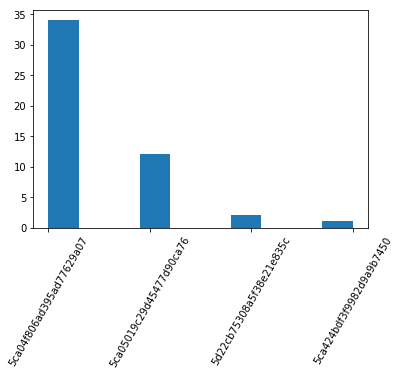

In [0]:
ngos = []
for i in range(dfi.shape[0]):
  temp = df[dfi["campaignid"][i]==df["campaignid"]]["ngo"]
  ngos.append(temp.values[0])
dfi["ngo"] = ngos
plt.hist(dfi[dfi["sazenId"]=="5c4eca02045bbda55590dd84"]["ngo"].to_numpy().tolist())
plt.xticks(rotation=60)

([<matplotlib.axis.XTick at 0x7f662b1aaf60>,
 <a list of 3 Text xticklabel objects>)

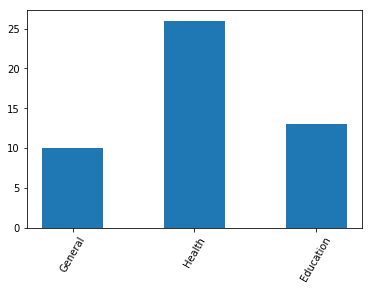

In [0]:
campaignTags = []
for i in range(dfi.shape[0]):
  temp = df[dfi["campaignid"][i]==df["campaignid"]]["tags"]
  campaignTags.append(temp.values[0])
dfi["tags"] = campaignTags
plt.hist(dfi[dfi["sazenId"]=="5c4eca02045bbda55590dd84"]["tags"].to_numpy().tolist(),bins=[0. , 0.5, 1. , 1.5, 2. , 2.5])
plt.xticks(np.arange(3)+0.25,rotation=60)

([<matplotlib.axis.XTick at 0x7f662b1b4278>,
 <a list of 4 Text xticklabel objects>)

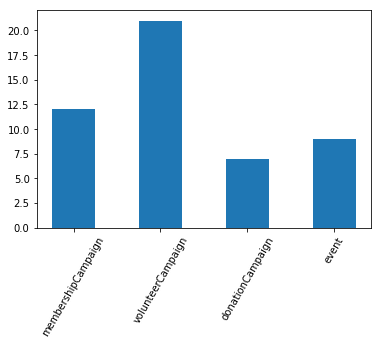

In [0]:
campaignTypes = []
for i in range(dfi.shape[0]):
  temp = df[dfi["campaignid"][i]==df["campaignid"]]["campaignType"]
  campaignTypes.append(temp.values[0])
dfi["campaignType"] = campaignTypes
plt.hist(dfi[dfi["sazenId"]=="5c4eca02045bbda55590dd84"]["campaignType"].to_numpy().tolist(),bins=[0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5])
plt.xticks(np.arange(4)+0.25,rotation=60)

([<matplotlib.axis.XTick at 0x7f662e0e8a58>,
 <a list of 6 Text xticklabel objects>)

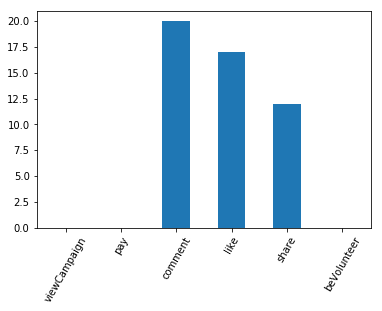

In [0]:
dfi["random"] = dfi["random"].astype(int)
plt.hist(dfi[dfi["sazenId"]=="5c4eca02045bbda55590dd84"]["random"].to_numpy().tolist(),bins=[0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5.,5.5])
plt.xticks(np.arange(6)+0.25,labels=["viewCampaign","pay","comment","like","share","beVolunteer"],rotation=60)
#["viewCampaign","pay","comment","like","share","beVolunteer"],

In [0]:
from recombee_api_client.api_requests import  UserBasedRecommendation,ItemBasedRecommendation,RecommendItemsToUser
recommended = client.send(RecommendItemsToUser('5c4eca02045bbda55590dd84', 5,))
print("Recommended items: %s" % recommended)

Recommended items: {'recommId': 'f8777331fb61eac4ad25daaef066a4aa', 'recomms': [{'id': '5d2854cdd66f137fe67ea4b4'}, {'id': '5d135adb9f3c071e9eb447d1'}, {'id': '5d3ec874123b3575b9c90395'}, {'id': '5ce235b612e2e80913a4aa80'}, {'id': '5cbd6053541fec184604611a'}]}


In [0]:
df[(df["campaignid"]=="5d2854cdd66f137fe67ea4b4") | (df["campaignid"]=="5d135adb9f3c071e9eb447d1") | (df["campaignid"]=="5d3ec874123b3575b9c90395") | (df["campaignid"]=="5ce235b612e2e80913a4aa80") | (df["campaignid"]=="5cbd6053541fec184604611a")]

,campaignid,city,state,country,tags,IsActive,ngo,campaignType
36,5cbd6053541fec184604611a,Bengaluru,Karnataka,India,General,PUBLISHED,5ca04f806ad395ad77629a07,volunteerCampaign
47,5ce235b612e2e80913a4aa80,Bengaluru,Karnataka,India,General,PUBLISHED,5ca04f806ad395ad77629a07,volunteerCampaign
55,5d135adb9f3c071e9eb447d1,Bengaluru,Karnataka,India,Education,PUBLISHED,5ca04f806ad395ad77629a07,volunteerCampaign
72,5d2854cdd66f137fe67ea4b4,Navi Mumbai,Maharashtra,India,Health,PUBLISHED,5ca04f806ad395ad77629a07,volunteerCampaign
84,5d3ec874123b3575b9c90395,Bengaluru,Karnataka,India,General,PUBLISHED,5ca04f806ad395ad77629a07,membershipCampaign


In [0]:
df[(df["campaignid"]=="5d135adb9f3c071e9eb447d1") | (df["campaignid"]=="5d3ec874123b3575b9c90395") | (df["campaignid"]=="5ce235b612e2e80913a4aa80") | (df["campaignid"]=="5cbd6053541fec184604611a") | (df["campaignid"]=="5cfe2f41c3a29041e17ad00d")]

,campaignid,city,state,country,tags,IsActive,ngo,campaignType
36,5cbd6053541fec184604611a,Bengaluru,Karnataka,India,General,PUBLISHED,5ca04f806ad395ad77629a07,volunteerCampaign
47,5ce235b612e2e80913a4aa80,Bengaluru,Karnataka,India,General,PUBLISHED,5ca04f806ad395ad77629a07,volunteerCampaign
49,5cfe2f41c3a29041e17ad00d,Bengaluru,Karnataka,India,General,PUBLISHED,5ca04f806ad395ad77629a07,volunteerCampaign
55,5d135adb9f3c071e9eb447d1,Bengaluru,Karnataka,India,Education,PUBLISHED,5ca04f806ad395ad77629a07,volunteerCampaign
84,5d3ec874123b3575b9c90395,Bengaluru,Karnataka,India,General,PUBLISHED,5ca04f806ad395ad77629a07,membershipCampaign


In [0]:
from recombee_api_client.api_requests import  RecommendUsersToUser
recommended = client.send(RecommendUsersToUser('5c4eca02045bbda55590dd84', 5,))
print("Recommended items: %s" % recommended)

Recommended items: {'recommId': '94dfeba1677fcae246057d39e1538039', 'recomms': [{'id': '5afaad90abacd6001b774ab5'}, {'id': '5c529aae917aac0011f3a1cf'}]}


In [0]:
from recombee_api_client.api_requests import  RecommendUsersToItem
recommended = client.send(RecommendUsersToItem('5d135adb9f3c071e9eb447d1', 5,))
print("Recommended items: %s" % recommended)

Recommended items: {'recommId': 'd69ea37b8035e7f0ba32d76afca5accf', 'recomms': [{'id': '5c4eca02045bbda55590dd84'}, {'id': '5afaad90abacd6001b774ab5'}]}


In [0]:
from recombee_api_client.api_requests import  RecommendItemsToItem
recommended = client.send(RecommendItemsToItem('5d135adb9f3c071e9eb447d1', '5c4eca02045bbda55590dd84',count=5,))
print("Recommended items: %s" % recommended)

Recommended items: {'recommId': '2b2dbb5b9e270b5ec8621d2543b52cb5', 'recomms': [{'id': '5d0881ee830acc143d7b1058'}, {'id': '5ca214dc25e6ad51d90896b3'}, {'id': '5ca05944585385cb612c1bb3'}, {'id': '5d2d9fe8d3758d11e63cf636'}, {'id': '5cfdebd081b899d31e62496c'}]}


([<matplotlib.axis.XTick at 0x7fd5b6c73630>,
 <a list of 4 Text xticklabel objects>)

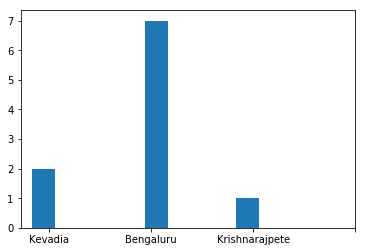

In [0]:
plt.hist(dfi[dfi["sazenId"]=="5afaad90abacd6001b774ab5"]["city"].to_numpy().tolist())
plt.xticks([0.15,1.05,1.95,2.85])

([<matplotlib.axis.XTick at 0x7fd5b6a765c0>,
 <a list of 2 Text xticklabel objects>)

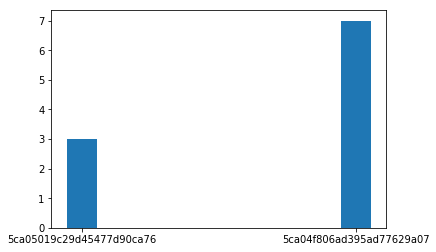

In [0]:
plt.hist(dfi[dfi["sazenId"]=="5afaad90abacd6001b774ab5"]["ngo"].to_numpy().tolist())
plt.xticks([0.05,0.95])

([<matplotlib.axis.XTick at 0x7fd5b6a53c88>,
 <a list of 4 Text xticklabel objects>)

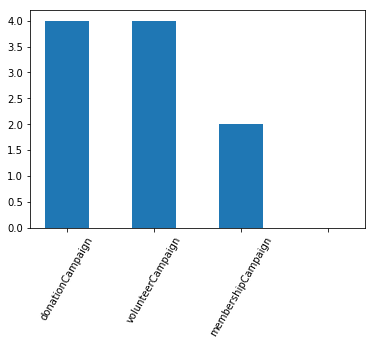

In [0]:
plt.hist(dfi[dfi["sazenId"]=="5afaad90abacd6001b774ab5"]["campaignType"].to_numpy().tolist(),bins=[0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5])
plt.xticks(np.arange(4)+0.25,rotation=60)

([<matplotlib.axis.XTick at 0x7fd5b69b8a90>,
 <a list of 6 Text xticklabel objects>)

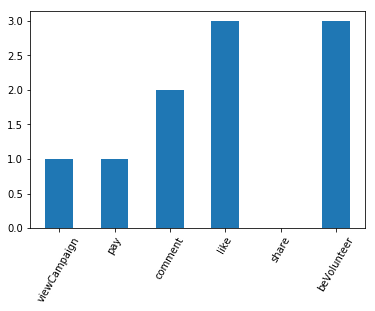

In [0]:
plt.hist(dfi[dfi["sazenId"]=="5afaad90abacd6001b774ab5"]["random"].to_numpy().tolist(),bins=[0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5.,5.5])
plt.xticks(np.arange(6)+0.25,labels=["viewCampaign","pay","comment","like","share","beVolunteer"],rotation=60)

In [0]:
from recombee_api_client.api_requests import  UserBasedRecommendation,ItemBasedRecommendation,RecommendItemsToUser
recommended = client.send(RecommendItemsToUser('5afaad90abacd6001b774ab5', 5,))
print("Recommended items: %s" % recommended)

Recommended items: {'recommId': '7ae8a7e0-bc59-4c84-8f58-2be2f3bbc525', 'recomms': [{'id': '5ca5c917762308767b8bcd3a'}, {'id': '5ca5ced4762308767b8bcd71'}, {'id': '5ca051a6c29d45477d90ca7e'}, {'id': '5ca6e12220b120a140e619ea'}, {'id': '5cc32109f3b060ce121bc09f'}]}


In [0]:
#5c4eca02045bbda55590dd84 ==> user1(city=bengaluru) like 2 campaigns from  kevdia,gujrat,ngo-5ca05019c29d45477d90ca76 and 3 from  bengaluru,karnataka,ngo-5ca05019c29d45477d90ca76
recommended = client.send(RecommendItemsToUser('5c4eca02045bbda55590dd84', 3))
print("Recommended items: %s" % recommended)
#5ca5ce2f762308767b8bcd51  ==> Kevadia, gujrat,ngo-5ca05019c29d45477d90ca76 ,liked by user-2
#5ca5c917762308767b8bcd3a  ==> Kevadia, gujrat,ngo-5ca05019c29d45477d90ca76 ,liked by user-2
#5ca60afa48e2d4a60fe7076c  ==>  bengaluru,karnataka,ngo-5ca05019c29d45477d90ca76, not liked by anyone yet

In [0]:
#filtering the output based on city like Bengaluru
recommended = client.send(RecommendItemsToUser('5c4eca02045bbda55590dd84', 3,filter="'city'==\"Bengaluru\""))
print("Recommended items: %s" % recommended)
#5ca60afa48e2d4a60fe7076c  ==> bengaluru,karnataka,ngo-5ca05019c29d45477d90ca76, not liked by anyone yet
#5ca6e12220b120a140e619ea  ==> bengaluru,karnataka,ngo-5ca05019c29d45477d90ca76, not liked by anyone yet
#5cb094916274475fdd8899af  ==> bengaluru,karnataka,ngo-5ca05019c29d45477d90ca76, not liked by anyone yet

Recommended items: {'recommId': '146738bc7b86a9f02b6b62dd452a094e', 'recomms': [{'id': '5ca60afa48e2d4a60fe7076c'}, {'id': '5ca6e12220b120a140e619ea'}, {'id': '5cb094916274475fdd8899af'}]}


In [0]:
# client.send(
#     Batch(
#         [
#             DeleteDetailView("5c4eca02045bbda55590dd84", "5ca5cf33762308767b8bcd8c"),
#             DeleteDetailView("5c4eca02045bbda55590dd84", "5ca5ced4762308767b8bcd71")
#         ]
#     )
# )

[{'code': 200, 'json': 'ok'}]

In [0]:
#5c4eca02045bbda55590dd84 ==> user1(city=bengaluru) 3 from  bengaluru,karnataka,ngo-5ca05019c29d45477d90ca76
recommended = client.send(RecommendItemsToUser('5c4eca02045bbda55590dd84', 3))
print("Recommended items: %s" % recommended)
#5ca60afa48e2d4a60fe7076c  ==> bengaluru,karnataka,ngo-5ca05019c29d45477d90ca76, not liked by anyone yet
#5ca6e12220b120a140e619ea  ==> bengaluru,karnataka,ngo-5ca05019c29d45477d90ca76, not liked by anyone yet
#5cb094916274475fdd8899af  ==> bengaluru,karnataka,ngo-5ca05019c29d45477d90ca76, not liked by anyone yet

Recommended items: {'recommId': '7508f81b51e3a681261cf692efe57e35', 'recomms': [{'id': '5ca60afa48e2d4a60fe7076c'}, {'id': '5ca6e12220b120a140e619ea'}, {'id': '5cb094916274475fdd8899af'}]}


In [0]:
#5c4eca02045bbda55590dd84 ==> user1(city=kevadia) like 3 from  bengaluru,karnataka,ngo-5ca05019c29d45477d90ca76
recommended = client.send(RecommendItemsToUser('5c4eca02045bbda55590dd84', 3))
print("Recommended items: %s" % recommended)
#5ca60afa48e2d4a60fe7076c  ==> bengaluru,karnataka,ngo-5ca05019c29d45477d90ca76, not liked by anyone yet
#5ca6e12220b120a140e619ea  ==> bengaluru,karnataka,ngo-5ca05019c29d45477d90ca76, not liked by anyone yet
#5cb094916274475fdd8899af  ==> bengaluru,karnataka,ngo-5ca05019c29d45477d90ca76, not liked by anyone yet

Recommended items: {'recommId': '4ed7a63ec0211a5098120bef8a68fe8e', 'recomms': [{'id': '5ca60afa48e2d4a60fe7076c'}, {'id': '5ca6e12220b120a140e619ea'}, {'id': '5cb094916274475fdd8899af'}]}


In [0]:
from recombee_api_client.api_requests import  UserBasedRecommendation,ItemBasedRecommendation,RecommendItemsToUser

# Get recommendations for user 'user-2'
#5c529aae917aac0011f3a1cf ==> user2 (city=kevadia) like 2 campaigns from  kevdia,gujrat,ngo-5ca05019c29d45477d90ca76
recommended = client.send(RecommendItemsToUser('5c529aae917aac0011f3a1cf', 3,))
print("Recommended items: %s" % recommended)

Recommended items: {'recommId': 'dffedcad85c8a4e8102307db7b90ede5', 'recomms': [{'id': '5cb454ebbdfb7e70901607d5'}, {'id': '5cb4553bbdfb7e70901607e7'}, {'id': '5ca5c917762308767b8bcd3a'}]}


In [0]:
from recombee_api_client.api_requests.recommend_items_to_user import RecommendItemsToUser
from recombee_api_client.api_requests.recommend_users_to_user import RecommendUsersToUser
from recombee_api_client.api_requests.recommend_items_to_item import RecommendItemsToItem
from recombee_api_client.api_requests.recommend_users_to_item import RecommendUsersToItem
#from recombee_api_client.api_requests.user_based_recommendation import UserBasedRecommendation
#from recombee_api_client.api_requests.item_based_recommendation import ItemBasedRecommendation

# from recombee_api_client.api_requests import  UserBasedRecommendation,ItemBasedRecommendation,RecommendItemsToUser

# # Get recommendations for user 'user-1'
# #5c529aae917aac0011f3a1cf ==> user2 like kevdia,gujrat,ngo-5ca05019c29d45477d90ca76
# recommended = client.send(RecommendItemsToUser('5c529aae917aac0011f3a1cf', 3))
# print("Recommended items: %s" % recommended)
# #5ca5c917762308767b8bcd3a =>  Kevadia, gujrat,ngo-5ca05019c29d45477d90ca76 liked by user1
# #5ca5cf33762308767b8bcd8c =>  Kevadia, gujrat,ngo-5ca05019c29d45477d90ca76 not liked by anyone yet
# #5ca5ced4762308767b8bcd71 =>  Kevadia, gujrat,ngo-5ca05019c29d45477d90ca76 not liked by anyone yet

In [0]:
RecommendUsersToItem?

In [0]:
#5c4eca02045bbda55590dd84  ==> user1 like 5 campaign from ngo-5ca05019c29d45477d90ca76 and of kevadia,Bengaluru,hyderabad
recommended = client.send(RecommendItemsToUser('5c4eca02045bbda55590dd84', 3))
print("Recommended items: %s" % recommended)
#5ca5ce2f762308767b8bcd51  =>  Kevadia, gujrat,ngo-5ca05019c29d45477d90ca76 not liked by anyone yet
#5ca5cf33762308767b8bcd8c  =>  Kevadia, gujrat,ngo-5ca05019c29d45477d90ca76 not liked by anyone yet
#5ca5ced4762308767b8bcd71  =>  Kevadia, gujrat,ngo-5ca05019c29d45477d90ca76 not liked by anyone yet

Recommended items: {'recommId': 'f49a5afd4906c98b8218c1de0db75478', 'recomms': [{'id': '5ca5ce2f762308767b8bcd51'}, {'id': '5ca5cf33762308767b8bcd8c'}, {'id': '5ca5ced4762308767b8bcd71'}]}


In [0]:
# Get 3 recommendations for "5c529aae917aac0011f3a1cf" user-2, who is currently viewing "5ca0a7530aaf3f61807e1062" ==> bengaluru, from ngo-5ca05019c29d45477d90ca76

#RecommendItemsToItem(item,user,count)

recommended = client.send(RecommendItemsToItem("5ca0a7530aaf3f61807e1062","5c529aae917aac0011f3a1cf", 3))
print("Recommended items: %s" % recommended)
#5ca051a6c29d45477d90ca7e  => bengaluru,Karnataka,ngo-5ca05019c29d45477d90ca76 liked by user-1
#5ca094a6c29d45477d90cb09  => bengaluru,Karnataka,ngo-5ca05019c29d45477d90ca76 liked by user-1
#5ca60afa48e2d4a60fe7076c  => bengaluru,Karnataka,ngo-5ca05019c29d45477d90ca76 not liked by anyone yet

Recommended items: {'recommId': '8c38116de295403e4da3b93861be6802', 'recomms': [{'id': '5ca051a6c29d45477d90ca7e'}, {'id': '5ca094a6c29d45477d90cb09'}, {'id': '5ca60afa48e2d4a60fe7076c'}]}


In [0]:
#Show history of last transaction
recommended = client.send(RecommendItemsToUser('5c4eca02045bbda55590dd84', 5,logic="ecommerce:homepage"))
print("Recommended items: %s" % recommended)

Recommended items: {'recommId': 'fdd59ea5e56e3cdbe14db6bb5ee94da0', 'recomms': [{'id': '5ca5c917762308767b8bcd3a'}, {'id': '5ca0a7530aaf3f61807e1062'}, {'id': '5ca094a6c29d45477d90cb09'}, {'id': '5cb454ebbdfb7e70901607d5'}, {'id': '5ca051a6c29d45477d90ca7e'}]}


In [0]:
#Show history of last transaction
recommended = client.send(RecommendItemsToUser('5c529aae917aac0011f3a1cf', 5,logic="ecommerce:cross-sell"))
print("Recommended items: %s" % recommended)

Recommended items: {'recommId': 'de1161c26745af54508338e0e42f34b3', 'recomms': [{'id': '5ca0a7530aaf3f61807e1062'}, {'id': '5cc321eff3b060ce121bc0bd'}, {'id': '5d00f16ff6a60c0014c6e1eb'}, {'id': '5d4805cbf4c53e2d486cd8d2'}, {'id': '5cbd60dc541fec184604613d'}]}


In [0]:
client.send(AddUserProperty("age", type))
client.send(AddUserProperty("gender", type))
client.send(AddUserProperty("location", type))
client.send(AddUserProperty("income", type))
client.send(AddUserProperty("education", type))